**LEVEL 3: TASK 7**


Monthly Sales Summary:


/tmp/ipython-input-3232422912.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby(pd.Grouper(key='Date', freq='M'))['Weekly_Sales'].sum().reset_index()


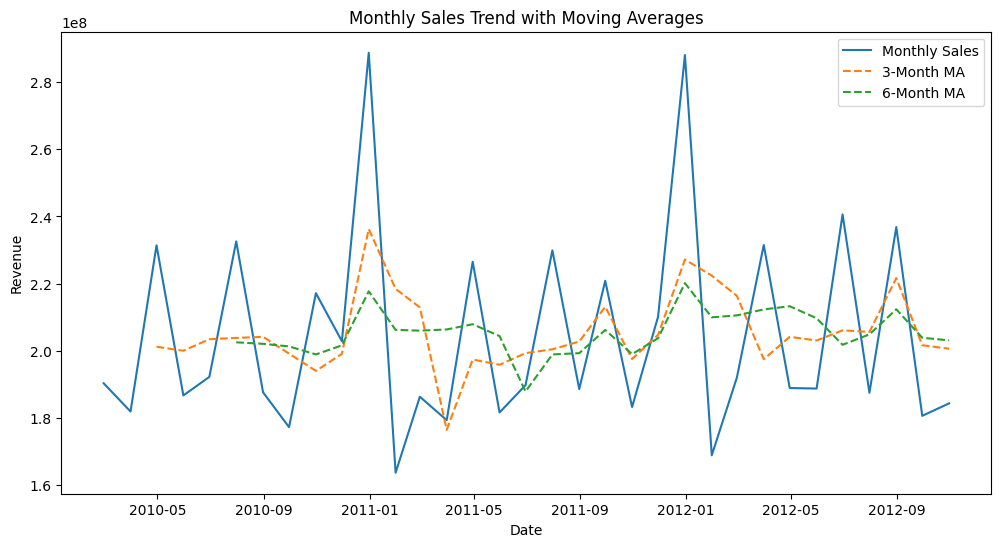

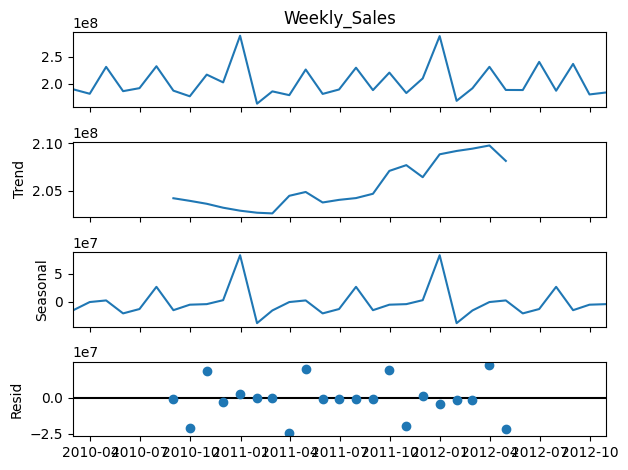


Revenue by Product Category Over Time:


/tmp/ipython-input-3232422912.py:52: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  product_monthly = df.groupby([pd.Grouper(key='Date', freq='M'), 'Product_Category'])['Weekly_Sales'].sum().reset_index()


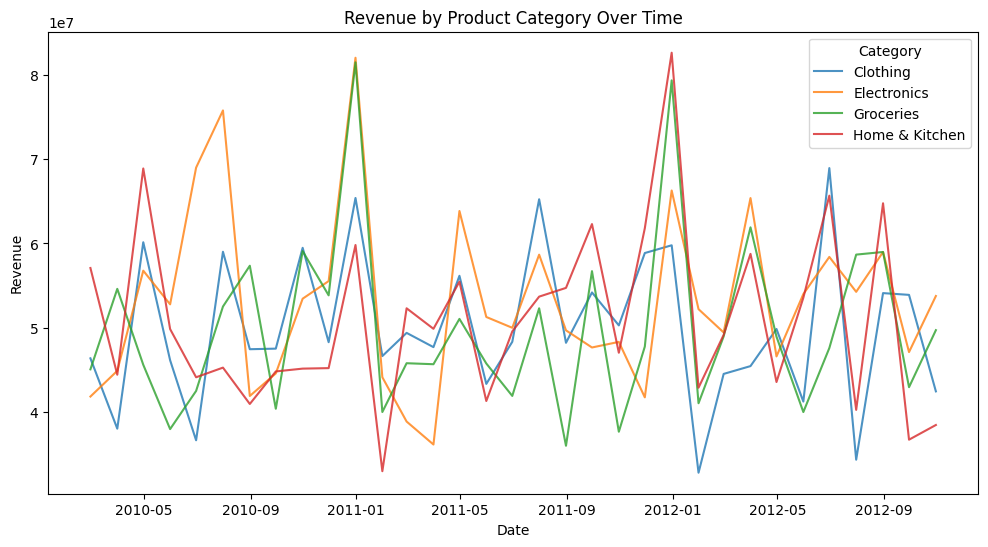


Revenue by Region Over Time:


/tmp/ipython-input-3232422912.py:66: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  region_monthly = df.groupby([pd.Grouper(key='Date', freq='M'), 'Region'])['Weekly_Sales'].sum().reset_index()


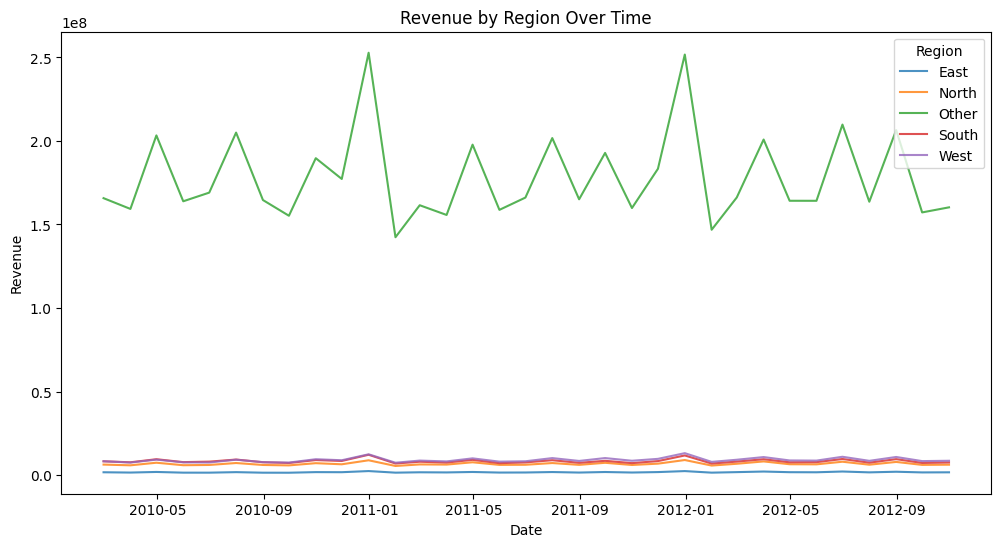

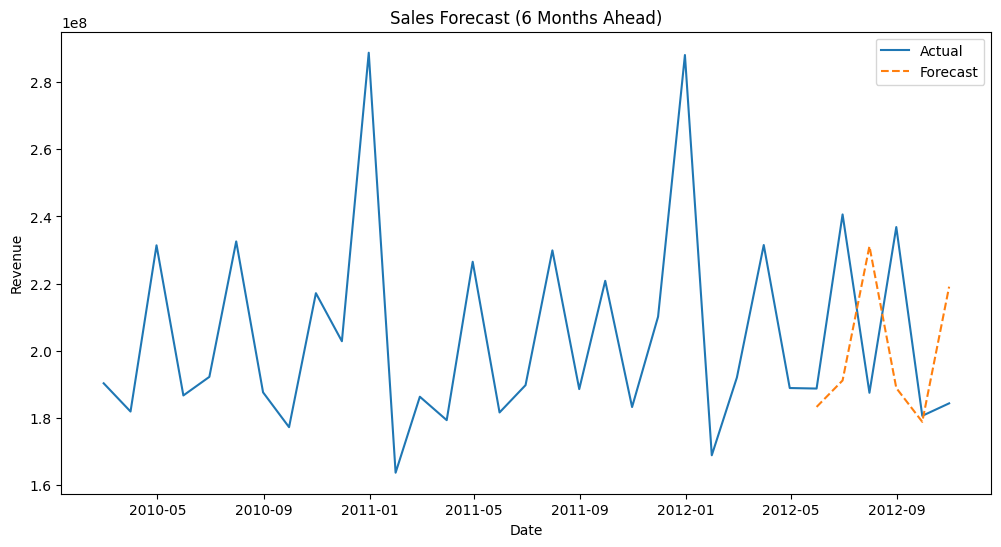


Forecasted Sales for Next 6 Months:


from matplotlib import pyplot as plt
_df_12['Forecasted_Sales'].plot(kind='hist', bins=20, title='Forecasted_Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Forecasted_Sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Forecasted_Sales')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Forecasted_Sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Forecasted_Sales')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_16.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_17['Forecasted_Sales'].plot(kind='line', figsize=(8, 4), title='Forecasted_Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from google.colab import data_table
data_table.enable_dataframe_formatter()

# Load Dataset
file_path = "Walmart.csv"
df = pd.read_csv(file_path)

# Preprocessing
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values('Date')

# Simulating Product Categories
np.random.seed(42)
categories = ["Electronics", "Clothing", "Groceries", "Home & Kitchen"]
df['Product_Category'] = np.random.choice(categories, size=len(df))

# Map Stores to Regions
store_to_region = {1: "North", 2: "South", 3: "East", 4: "West"}
df['Region'] = df['Store'].map(store_to_region).fillna("Other")

# Monthly Sales Trend
monthly_sales = df.groupby(pd.Grouper(key='Date', freq='M'))['Weekly_Sales'].sum().reset_index()
monthly_sales['MA_3'] = monthly_sales['Weekly_Sales'].rolling(3).mean()
monthly_sales['MA_6'] = monthly_sales['Weekly_Sales'].rolling(6).mean()

print("\nMonthly Sales Summary:")
display(data_table.DataTable(monthly_sales, include_index=False))

plt.figure(figsize=(12,6))
plt.plot(monthly_sales['Date'], monthly_sales['Weekly_Sales'], label='Monthly Sales')
plt.plot(monthly_sales['Date'], monthly_sales['MA_3'], label='3-Month MA', linestyle='--')
plt.plot(monthly_sales['Date'], monthly_sales['MA_6'], label='6-Month MA', linestyle='--')
plt.title("Monthly Sales Trend with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.show()

# Seasonal Decomposition
decomp = seasonal_decompose(monthly_sales.set_index('Date')['Weekly_Sales'], model='additive', period=12)
decomp.plot()
plt.show()

# Revenue by Product Category Over Time
product_monthly = df.groupby([pd.Grouper(key='Date', freq='M'), 'Product_Category'])['Weekly_Sales'].sum().reset_index()

print("\nRevenue by Product Category Over Time:")
display(data_table.DataTable(product_monthly, include_index=False))

plt.figure(figsize=(12,6))
sns.lineplot(data=product_monthly, x='Date', y='Weekly_Sales', hue='Product_Category', alpha=0.8)
plt.title("Revenue by Product Category Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend(title='Category')
plt.show()

# Revenue by Region Over Time
region_monthly = df.groupby([pd.Grouper(key='Date', freq='M'), 'Region'])['Weekly_Sales'].sum().reset_index()

print("\nRevenue by Region Over Time:")
display(data_table.DataTable(region_monthly, include_index=False))

plt.figure(figsize=(12,6))
sns.lineplot(data=region_monthly, x='Date', y='Weekly_Sales', hue='Region', alpha=0.8)
plt.title("Revenue by Region Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend(title='Region')
plt.show()

# Simple Forecasting
train = monthly_sales[:-6]
test = monthly_sales[-6:]

model = ExponentialSmoothing(train['Weekly_Sales'], trend='add', seasonal='add', seasonal_periods=12)
fit = model.fit()
forecast = fit.forecast(steps=6)

plt.figure(figsize=(12,6))
plt.plot(monthly_sales['Date'], monthly_sales['Weekly_Sales'], label='Actual')
plt.plot(test['Date'], forecast, label='Forecast', linestyle='--')
plt.title("Sales Forecast (6 Months Ahead)")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.show()

print("\nForecasted Sales for Next 6 Months:")
forecast_df = pd.DataFrame({'Date': test['Date'], 'Forecasted_Sales': forecast})
display(data_table.DataTable(forecast_df, include_index=False))
